In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('BIKE DETAILS.csv')
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [128]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [129]:
max_value=df.selling_price.max() #maximum value of selling price
min_value=df.selling_price.min() #minimum price of selling price
print(f"range of selling price is between {min_value} and {max_value}")

range of selling price is between 5000 and 760000


In [130]:
median_of_selling_price=df.selling_price.median()
print("median of selling_price is ",median_of_selling_price)

median of selling_price is  45000.0


In [131]:
df.seller_type

,seller_type
0,Individual
1,Individual
2,Individual
3,Individual
4,Individual
...,...
1056,Individual
1057,Individual
1058,Individual
1059,Individual


In [132]:
common=df.seller_type.value_counts()
print("common seller type is Individual")

common seller type is Individual


In [133]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [134]:
km_driven=df[df.km_driven>50000]
km_driven.shape
#totla vehicle which driven more then 50000 km are 170


(170, 7)

In [135]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [136]:
average_km_owner=df.groupby('owner')['km_driven'].mean()
average_km_owner
#here is the average km driven for each type of owner

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [137]:
df_len=len(df)
older_morethen_2015=df[df.year<=2015]

proportion=len(older_morethen_2015)/df_len
print(f"proportion bikes are from year 2015 or older is {proportion}")
#601 bikes are from year 2015 or older

proportion bikes are from year 2015 or older is 0.5664467483506126


In [138]:


# Check for missing values
missing_values = df.isnull().sum()

missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

missing_df = missing_df[missing_df['Missing Values'] > 0]

missing_df = missing_df.sort_values(by="Percentage (%)", ascending=False)

print(missing_df)


                   Missing Values  Percentage (%)
ex_showroom_price             435       40.999057


In [139]:
max_price_row = df.loc[df['ex_showroom_price'].idxmax()]
max_price_row
#highest price of ex_showroom_price is 1278000.0
print(f"In ex_showroom_price {max_price_row['name']} has maximum price which is {max_price_row['ex_showroom_price']}")



In ex_showroom_price Harley-Davidson Street Bob has maximum price which is 1278000.0


In [140]:
df.seller_type.value_counts()
#total number of bikes listed by each seller type is as below




,count
seller_type,
Individual,1055
Dealer,6


In [141]:
first_owner_bikes=df[df['owner']=='1st owner']
correlation = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven'])
print(f"Correlation between selling_price and km_driven: {correlation:.2f}")

Correlation between selling_price and km_driven: -0.24


In [142]:
Q1=df['km_driven'].quantile(0.25)
Q3=df['km_driven'].quantile(0.75)

IQR=Q3-Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
df_cleaned

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


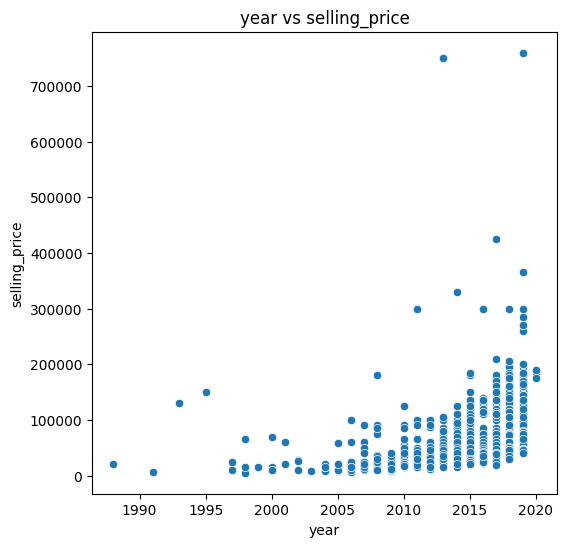

In [143]:

plt.figure(figsize=(6,6))
sns.scatterplot(x="year",y="selling_price",data=df,palette="viridis")
plt.title("year vs selling_price")
plt.xlabel("year")
plt.ylabel("selling_price")
plt.show()


In [144]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [145]:
df.columns
# df.year.value_counts()

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [146]:
from datetime import datetime

current_year = datetime.now().year  # Get current year dynamically
df['bike_age'] = current_year - df['year']
avg_depreciation = df.groupby('bike_age')['selling_price'].mean().reset_index()
avg_depreciation.rename(columns={'selling_price': 'avg_selling_price'}, inplace=True)

df['depreciation_per_year'] = (df['ex_showroom_price'] - df['selling_price']) / df['bike_age']
df['depreciation_per_year'] = df['depreciation_per_year'].replace([float('inf'), float('-inf')], 0)  # Handle division by zero

avg_depreciation_rate = df.groupby('bike_age')['depreciation_per_year'].mean().reset_index()
avg_depreciation_rate.rename(columns={'depreciation_per_year': 'avg_depreciation_per_year'}, inplace=True)
avg_depreciation_rate.dropna(inplace=True)
avg_depreciation_rate





,bike_age,avg_depreciation_per_year
0,5,-6852.000000
1,6,492.427083
2,7,1860.456401
3,8,2788.260294
4,9,3147.576720
5,10,2801.327500
6,11,3136.873278
7,12,3590.573899
8,13,2870.588358
9,14,3364.476190


In [154]:
# Calculate average selling price per year
avg_price = df.groupby('year')['selling_price'].mean().reset_index()
avg_price.rename(columns={'selling_price': 'avg_price'}, inplace=True)
avg_price.columns
df = df.merge(avg_price, on='year', how='left')
      # Unique years in main dataset






MergeError: Passing 'suffixes' which cause duplicate columns {'avg_price_x'} is not allowed.

In [159]:

df.avg_price

# Set threshold multiplier
threshold_multiplier = 1.5
# print(df['avg_price'])
expensive_bikes = df[df['selling_price'] >= threshold_multiplier * df['avg_price']]
# print(expensive_bikes)
# Select relevant columns
expensive_bike_names = expensive_bikes[['name', 'year', 'selling_price']]

# # Display results
print(expensive_bike_names)

                                     name  year  selling_price
2     Royal Enfield Classic Gunmetal Grey  2018         150000
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                          Yamaha YZF R3  2019         365000
18    Royal Enfield Classic Gunmetal Grey  2018         150000
23                          Jawa Standard  2019         180000
..                                    ...   ...            ...
979             Royal Enfield Thunder 500  2015         105000
981             Royal Enfield Thunder 350  2013         105000
983             Royal Enfield Classic 350  2015         100000
984             Royal Enfield Classic 500  2014          95000
985             Royal Enfield Classic 500  2011          90000

[158 rows x 3 columns]


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   1061 non-null   object 
 1   selling_price          1061 non-null   int64  
 2   year                   1061 non-null   int64  
 3   seller_type            1061 non-null   object 
 4   owner                  1061 non-null   object 
 5   km_driven              1061 non-null   int64  
 6   ex_showroom_price      626 non-null    float64
 7   bike_age               1061 non-null   int64  
 8   depreciation_per_year  626 non-null    float64
 9   avg_price_x            1061 non-null   float64
 10  avg_price_y            1061 non-null   float64
 11  avg_price              1061 non-null   float64
dtypes: float64(5), int64(4), object(3)
memory usage: 99.6+ KB


In [162]:
df_numeric= df.select_dtypes(include=["number"])
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   selling_price          1061 non-null   int64  
 1   year                   1061 non-null   int64  
 2   km_driven              1061 non-null   int64  
 3   ex_showroom_price      626 non-null    float64
 4   bike_age               1061 non-null   int64  
 5   depreciation_per_year  626 non-null    float64
 6   avg_price_x            1061 non-null   float64
 7   avg_price_y            1061 non-null   float64
 8   avg_price              1061 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 74.7 KB


In [163]:
correlation_values=df_numeric.corr()
correlation_values

,selling_price,year,km_driven,ex_showroom_price,bike_age,depreciation_per_year,avg_price_x,avg_price_y,avg_price
selling_price,1.000000,0.402188,-0.212937,0.918583,-0.402188,0.383799,0.501140,0.501140,0.501140
year,0.402188,1.000000,-0.288675,0.126378,-1.000000,-0.148647,0.802547,0.802547,0.802547
km_driven,-0.212937,-0.288675,1.000000,-0.122011,0.288675,0.012413,-0.309402,-0.309402,-0.309402
ex_showroom_price,0.918583,0.126378,-0.122011,1.000000,-0.126378,0.698461,0.146598,0.146598,0.146598
bike_age,-0.402188,-1.000000,0.288675,-0.126378,1.000000,0.148647,-0.802547,-0.802547,-0.802547
depreciation_per_year,0.383799,-0.148647,0.012413,0.698461,0.148647,1.000000,-0.230257,-0.230257,-0.230257
avg_price_x,0.501140,0.802547,-0.309402,0.146598,-0.802547,-0.230257,1.000000,1.000000,1.000000
avg_price_y,0.501140,0.802547,-0.309402,0.146598,-0.802547,-0.230257,1.000000,1.000000,1.000000
avg_price,0.501140,0.802547,-0.309402,0.146598,-0.802547,-0.230257,1.000000,1.000000,1.000000


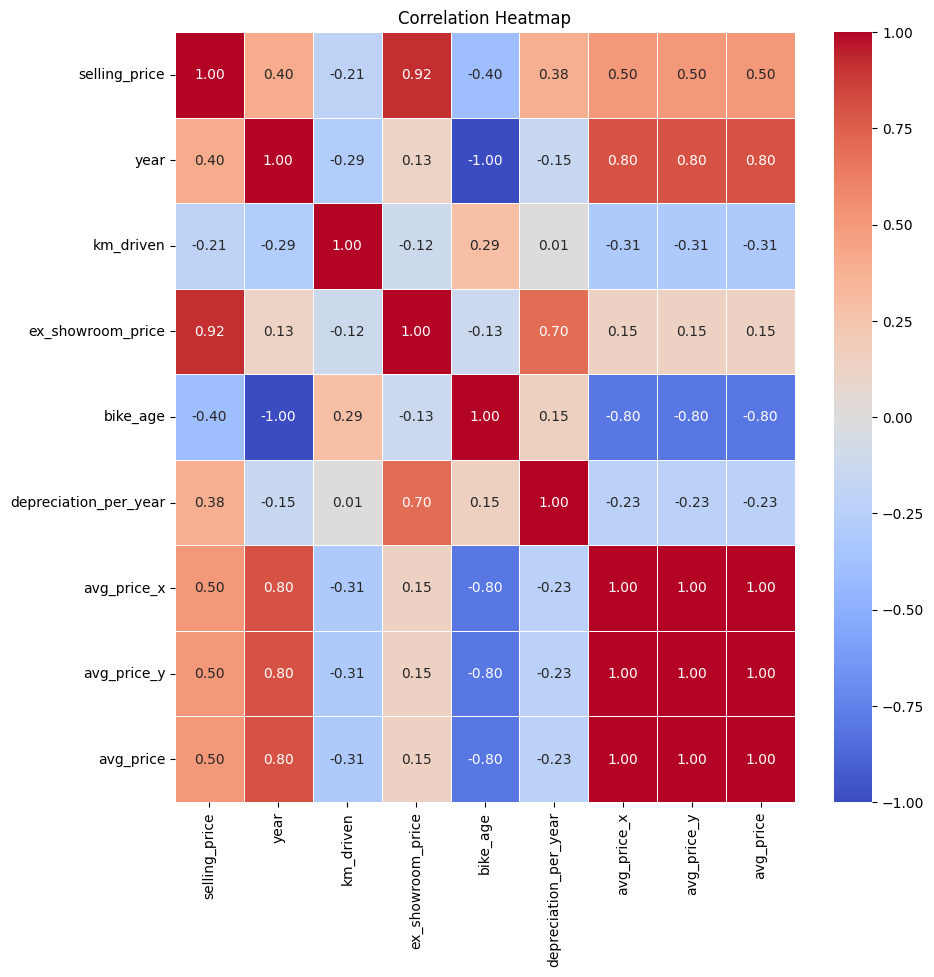

In [164]:
plt.figure(figsize=( 10,10))
sns.heatmap(correlation_values,annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#Eda of car